In [206]:
import numpy as np
import pandas as pd
import math


data = pd.read_csv("./irisData/bezdekIris.data").values
# print(data)

teste = []
treino = []

for idx, i in enumerate(data):
    if idx < 104:   # len(a) * .7
        treino.append(i)
    else:
        teste.append(i)


def classificador(mais_proximos):
    """
    Returns the majority label given a list of closes neighbors from training data set
    """
    label_counts = {}
    for label in mais_proximos:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    majority_label = max(label_counts, key=label_counts.get)
    return majority_label


def knn(plant, treino, k = 3):
    # k should be odd to prevent race between two labels
    closer_data_points = mais_proximos(plant, treino, k)
    class_prevista = classificador(closer_data_points)
    return class_prevista


def mais_proximos(plant, treino, k=3):
    distances = []
    
    for example in treino:
        # Calculate Euclidean distance between `plant` and `example`
        distance = math.sqrt(sum((plant[i] - example[i]) ** 2 for i in range(len(plant) - 1)))
        distances.append((distance, example[-1]))  # Store the distance and label

    # Sort distances and select the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = [label for _, label in distances[:k]]
    
    return nearest_neighbors









''''

# CLASSES
# 0 - Iris-setosa
# 1 - Iris-versicolor
# 2 - Iris-virginica


xkmenores = np.array([[0,100],[1,111],[2,1211]])
xkmenores = xkmenores[xkmenores[:,1].argsort()]
    
def ok(planta):
    for i in treino:
        distancia = math.sqrt((planta[0]-i[0])**2 +(planta[1]-i[1])**2+(planta[2]-i[2])**2+(planta[3]-i[3])**2)
        if distancia < xkmenores[0][1]:
            if i[4] == "Iris-virginica":
                yerp = 2
            elif i[4] == "Iris-versicolor":
                yerp = 1
            else:
                yerp = 0
            xkmenores[2] = xkmenores[1]
            xkmenores[1] = xkmenores[0]
            xkmenores[0][0] = yerp
            xkmenores[0][1] = distancia
            xkmenores = xkmenores[xkmenores[:,1].argsort()]
        if distancia < xkmenores[1][1]:
            if i[4] == "Iris-virginica":
                yerp = 2
            elif i[4] == "Iris-versicolor":
                yerp = 1
            else:
                yerp = 0
            xkmenores[2] = xkmenores[1]
            xkmenores[1][0] = yerp
            xkmenores[1][1] = distancia
            xkmenores = xkmenores[xkmenores[:,1].argsort()]
        if distancia < xkmenores[2][1]:
            if i[4] == "Iris-virginica":
                yerp = 2
            elif i[4] == "Iris-versicolor":
                yerp = 1
            else:
                yerp = 0
            xkmenores[2][0] = yerp
            xkmenores[2][1] = distancia
            xkmenores = xkmenores[xkmenores[:,1].argsort()]
            
    return xkmenores

print(ok(teste[5]))
'''

# Exercises Sheet 2 Introduction to Machine Learning

## Exercicio 1


w0 é o bias
w1 associado à entrada 1 
w2 associado à entrada 2

## Exercicio 1 Parte 2 (a partir do 1.7)

pontos gerados por uma gaussiana têm label 0
gerados pela outra gaussiana têm label 1


Vamos treinar o pecetrão para descubrir se foi gerado por uma gaussiana ou por outra.

## Exercício 2

## Exercício 3

## Exercicio 4

Nem é preciso programar? Calcular entropias etc.



# Exercicio 1

In [207]:
# Calculate the number of correct predictions k = 3

def test_accuracy(teste, treino, k=3):
    correct = 0
    total = len(teste)
    
    for plant in teste:
        true_label = plant[-1] # last element is label
        predicted_label = knn(plant, treino, k)
        
        if predicted_label == true_label:
            correct += 1

    # Calculate accuracy and error rate
    accuracy = (correct / total) * 100
    error_rate = 100 - accuracy

    # Print results
    print(f"Accuracy: {accuracy:.2f}% ({correct}/{total})")
    print(f"Error rate: {error_rate:.2f}% ({total - correct}/{total})")

test_accuracy(teste, treino, k=3)

Accuracy: 62.22% (28/45)
Error rate: 37.78% (17/45)


In [208]:
# Calculate the number of correct predictions k = 7

test_accuracy(teste, treino, k=7)

Accuracy: 51.11% (23/45)
Error rate: 48.89% (22/45)


In [209]:
# Calculate the number of correct predictions k = 11

test_accuracy(teste, treino, k=11)

Accuracy: 0.00% (0/45)
Error rate: 100.00% (45/45)


In [210]:
import numpy as np
# Exercise 1.1
print ("Using operator AND")

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

d = np.array([0, 0, 0, 1])

# Display input, expected output (d), and perceptron output
for i in range(len(X)):
    print(f"Input: {X[i]} | Target: {d[i]}")

Using operator AND
Input: [0 0] | Target: 0
Input: [0 1] | Target: 0
Input: [1 0] | Target: 0
Input: [1 1] | Target: 1


In [211]:
# Exercise 1.2
# Initialize w0, w1, and w2 to small random values
np.random.seed(9)  # For reproducibility
w0 = np.random.rand()
print (f"w0 (bias) is {w0}")
w1 = np.random.rand()
print (f"w1 is {w1}")
w2 = np.random.rand()
print (f"w2 is {w2}")

# Activation function f(s)#
def activation(s):
    return 1 if s > 0.5 else 0

# Calculate outputs for each input pattern
o = []
for x1, x2 in X:
    s = w0 + w1 * x1 + w2 * x2
    o.append(activation(s))
    #o.append(s)

o = np.array(o)
print(f"Output vector o: {o}")


w0 (bias) is 0.010374153885699955
w1 is 0.5018745921487388
w2 is 0.4957732931341461
Output vector o: [0 1 1 1]


In [212]:
# Exercise 1.3
# Calculate the error e = d - o
e = d - o

# Display input, expected output (d), perceptron output (o), and the difference (error e)
for i in range(len(X)):
    print(f"Input: {X[i]} | Target: {d[i]} | Output: {o[i]} | Error: {e[i]}")


Input: [0 0] | Target: 0 | Output: 0 | Error: 0
Input: [0 1] | Target: 0 | Output: 1 | Error: -1
Input: [1 0] | Target: 0 | Output: 1 | Error: -1
Input: [1 1] | Target: 1 | Output: 1 | Error: 0


In [213]:
# Learning rate
alpha = 1e-4

# Initialize update terms for w0, w1, and w2
delta_w0 = 0
delta_w1 = 0
delta_w2 = 0

# Update each weight based on the error for each input pattern
for i in range(len(X)):
    x1, x2 = X[i]
    delta_w0 += alpha * e[i]
    delta_w1 += alpha * x1 * e[i]
    delta_w2 += alpha * x2 * e[i]

# Display the update terms
print(f"∆w0: {delta_w0}")
print(f"∆w1: {delta_w1}")
print(f"∆w2: {delta_w2}")


∆w0: -0.0002
∆w1: -0.0001
∆w2: -0.0001


In [214]:
# Training parameters
alpha = 1e-4  # Learning rate
epochs = 100  # Number of epochs

# Activation function
def activation(s):
    return 1 if s > 0.5 else 0

# Training loop over epochs
for epoch in range(epochs):
    # Initialize update terms for each epoch
    delta_w0 = 0
    delta_w1 = 0
    delta_w2 = 0

    # Track cumulative error for the epoch
    epoch_error = 0

    # Process each input pattern
    print(f"\nEpoch {epoch + 1}/{epochs}")
    for i in range(len(X)):
        x1, x2 = X[i]
        
        # Calculate output
        s = w0 + w1 * x1 + w2 * x2
        o = activation(s)

        # Calculate error
        e = d[i] - o
        epoch_error += abs(e)  # Summing absolute error for tracking

        # Update terms for weights
        delta_w0 += alpha * e
        delta_w1 += alpha * x1 * e
        delta_w2 += alpha * x2 * e

        # Print the current input, target, output, and error
        print(f"  Input: {X[i]}, Target: {d[i]}, Output: {o}, Error: {e}")

    # Update weights at the end of each epoch
    w0 += delta_w0
    w1 += delta_w1
    w2 += delta_w2

    # Print weights and cumulative error after each epoch
    print(f"End of Epoch {epoch + 1} | w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f} | Total Error: {epoch_error}")



Epoch 1/100
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 1, Error: -1
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 1 | w0: 0.0102, w1: 0.5018, w2: 0.4957 | Total Error: 2

Epoch 2/100
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 1, Error: -1
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 2 | w0: 0.0100, w1: 0.5017, w2: 0.4956 | Total Error: 2

Epoch 3/100
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 1, Error: -1
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 3 | w0: 0.0098, w1: 0.5016, w2: 0.4955 | Total Error: 2

Epoch 4/100
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 1, Error: -1
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, O

## Exercicio 1.7

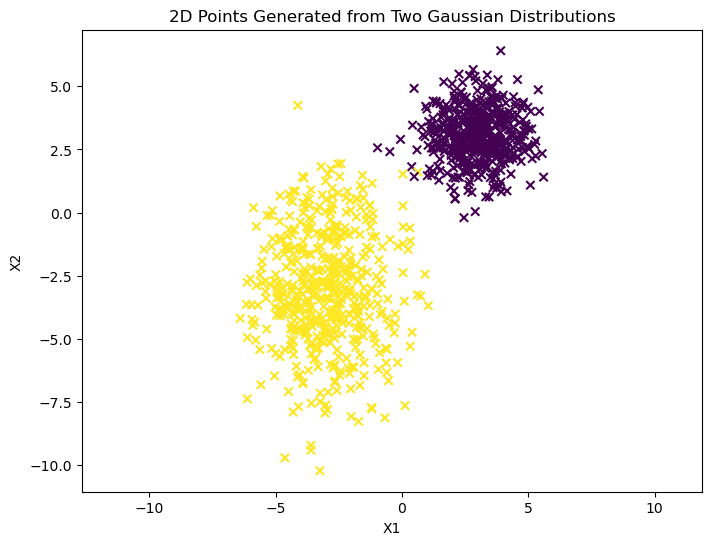

Dataset saved to 'my_data.csv'


In [215]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

num_points = 500

# Generate points for class 'a'
mean_a = [3, 3]
cov_a = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean_a, cov_a, num_points)
label_a = np.zeros((num_points, 1))  # Column of zeros for the first dataset
a = np.hstack((a, label_a))  # Combine points with labels

# Generate points for class 'b'
mean_b = [-3, -3]
cov_b = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean_b, cov_b, num_points) # .T #TODO ?
label_b = np.ones((num_points, 1))  # Column of ones for the second dataset
b = np.hstack((b, label_b))  # Combine points with labels

# Join and shuffle the dataset
dataset = np.vstack((a, b))
np.random.shuffle(dataset)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2], cmap='viridis', marker='x')
plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Points Generated from Two Gaussian Distributions')
plt.show()

# Save the dataset to a CSV file
df = pd.DataFrame(dataset, columns=['X1', 'X2', 'Label'])
df.to_csv("generated_dataset.csv", index=False)
print("Dataset saved to 'my_data.csv'")



In [216]:
import numpy as np
import pandas as pd

# Load the generated dataset
data = pd.read_csv("generated_dataset.csv").values
X = data[:, :2]  # Features (first two columns)
y = data[:, 2]   # Labels (third column)

# Perceptron parameters
alpha = 1e-2  # Learning rate
epochs = 50   # Number of epochs (adjustable for faster convergence)

# Initialize weights randomly between 0 and 1
w0, w1, w2 = np.random.rand(), np.random.rand(), np.random.rand()

# Activation function
def activation(s):
    return 1 if s > 0.5 else 0

# Training loop
for epoch in range(epochs):
    # Initialize update terms
    delta_w0, delta_w1, delta_w2 = 0, 0, 0
    epoch_error = 0  # Track total error

    # Iterate over all data points
    for i in range(len(X)):
        x1, x2 = X[i]
        
        # Calculate output
        s = w0 + w1 * x1 + w2 * x2
        o = activation(s)

        # Calculate error
        e = y[i] - o
        epoch_error += abs(e)  # Accumulate absolute error for the epoch

        # Update weight terms based on error
        delta_w0 += alpha * e
        delta_w1 += alpha * x1 * e
        delta_w2 += alpha * x2 * e

    # Update weights at the end of each epoch
    w0 += delta_w0
    w1 += delta_w1
    w2 += delta_w2

    # Print weights and error after each epoch
    print(f"Epoch {epoch + 1}/{epochs} | w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f} | Total Error: {epoch_error}")


Epoch 1/50 | w0: 0.2998, w1: -29.4719, w2: -29.8596 | Total Error: 992.0
Epoch 2/50 | w0: 0.3498, w1: -29.5176, w2: -29.7716 | Total Error: 5.0
Epoch 3/50 | w0: 0.3998, w1: -29.5634, w2: -29.6836 | Total Error: 5.0
Epoch 4/50 | w0: 0.4398, w1: -29.5974, w2: -29.6072 | Total Error: 4.0
Epoch 5/50 | w0: 0.4798, w1: -29.6314, w2: -29.5308 | Total Error: 4.0
Epoch 6/50 | w0: 0.5198, w1: -29.6654, w2: -29.4544 | Total Error: 4.0
Epoch 7/50 | w0: 0.5598, w1: -29.6994, w2: -29.3781 | Total Error: 4.0
Epoch 8/50 | w0: 0.5998, w1: -29.7335, w2: -29.3017 | Total Error: 4.0
Epoch 9/50 | w0: 0.6398, w1: -29.7675, w2: -29.2253 | Total Error: 4.0
Epoch 10/50 | w0: 0.6798, w1: -29.8015, w2: -29.1489 | Total Error: 4.0
Epoch 11/50 | w0: 0.7198, w1: -29.8355, w2: -29.0725 | Total Error: 4.0
Epoch 12/50 | w0: 0.7598, w1: -29.8695, w2: -28.9962 | Total Error: 4.0
Epoch 13/50 | w0: 0.7898, w1: -29.8623, w2: -28.9622 | Total Error: 3.0
Epoch 14/50 | w0: 0.8198, w1: -29.8552, w2: -28.9283 | Total Error: 3.0

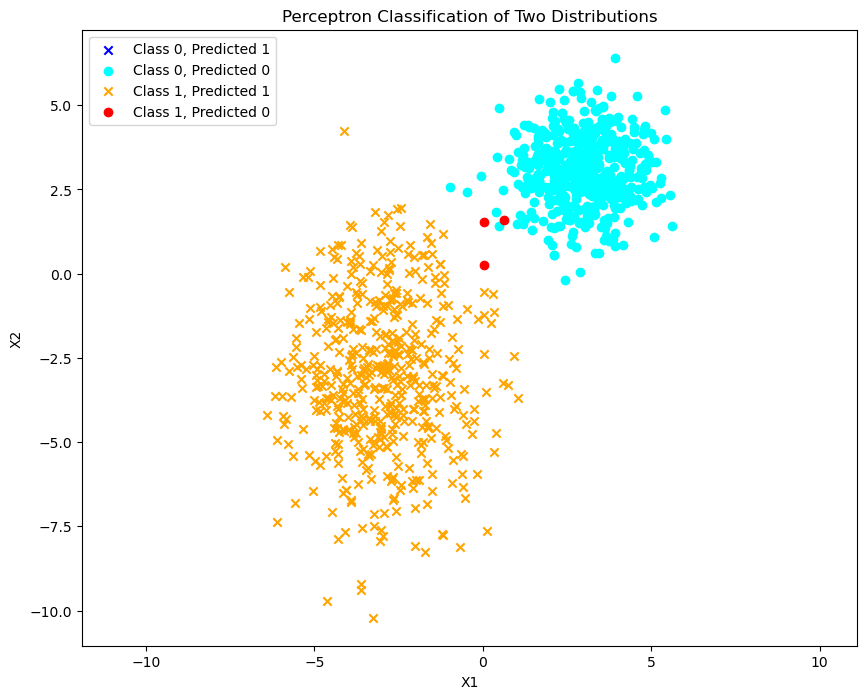

In [217]:
# Exercise 1.8
import matplotlib.pyplot as plt

# Predict labels using the trained perceptron
predicted_labels = []
for i in range(len(X)):
    x1, x2 = X[i]
    s = w0 + w1 * x1 + w2 * x2
    o = activation(s)
    predicted_labels.append(o)

predicted_labels = np.array(predicted_labels)

# Separate points based on true and predicted labels
a1 = X[(y == 0) & (predicted_labels == 1)]  # (a) First distribution, labeled 1
a0 = X[(y == 0) & (predicted_labels == 0)]  # (b) First distribution, labeled 0
b1 = X[(y == 1) & (predicted_labels == 1)]  # (c) Second distribution, labeled 1
b0 = X[(y == 1) & (predicted_labels == 0)]  # (d) Second distribution, labeled 0

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(a1[:, 0], a1[:, 1], color='blue', marker='x', label='Class 0, Predicted 1')
plt.scatter(a0[:, 0], a0[:, 1], color='cyan', marker='o', label='Class 0, Predicted 0')
plt.scatter(b1[:, 0], b1[:, 1], color='orange', marker='x', label='Class 1, Predicted 1')
plt.scatter(b0[:, 0], b0[:, 1], color='red', marker='o', label='Class 1, Predicted 0')

# Set plot parameters
plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.title('Perceptron Classification of Two Distributions')
plt.show()


In [218]:
# Ex 1.9
# Corrected confusion matrix calculation
def compute_confusion_matrix(y_true, y_pred):
    # Identify unique class labels and map them to integer indices
    classes = np.unique(y_true)
    class_to_index = {label: idx for idx, label in enumerate(classes)}
    
    # Initialize matrix of zeros with shape based on number of unique classes
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    
    # Fill the matrix by counting occurrences of (true, pred) label pairs
    for true, pred in zip(y_true, y_pred):
        matrix[class_to_index[true], class_to_index[pred]] += 1
    
    return matrix

# Calculate the confusion matrix
cm = compute_confusion_matrix(y, predicted_labels)

# Add labels to the matrix for display purposes
cm_with_labels = np.vstack([
    ["", "Predicted 0:", "Predicted 1:"],
    ["Actual 0:", *cm[0]],
    ["Actual 1:", *cm[1]]
])

print("Confusion Matrix:")
for row in cm_with_labels:
    print(row)

Confusion Matrix:
['' 'Predicted 0:' 'Predicted 1:']
['Actual 0:' '500' '0']
['Actual 1:' '3' '497']


In [219]:
n_tests = 30
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Function to calculate metrics manually
def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    
    # Accuracy: the ratio of correct predictions (both true positives and true negatives) to total predictions
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision: the ratio of true positive predictions to all positive predictions (true positives + false positives)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    
    # Recall: the ratio of true positive predictions to all actual positives (true positives + false negatives)
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    
    # F1 Score: the harmonic mean of precision and recall, a single metric balancing the two
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, precision, recall, f1

# Run metric calculation for each test
for _ in range(n_tests):
    # Initialize weights randomly
    w0, w1, w2 = np.random.rand(), np.random.rand(), np.random.rand()
    
    # Train the perceptron with new weights here (adjust this code to your training loop)
    # e.g., train_perceptron(X, y, w0, w1, w2)

    # Predict labels after training
    predicted_labels = np.array([activation(w0 + w1 * x[0] + w2 * x[1]) for x in X])
    
    # Calculate metrics for current test
    accuracy, precision, recall, f1 = calculate_metrics(y, predicted_labels)
    
    # Append current test metrics to the lists
    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# Calculate and print average metrics across all tests
avg_metrics = {k: np.mean(v) for k, v in metrics.items()}
print(f"Average Metrics over {n_tests} Tests:")
print(f"Accuracy (ratio of correct predictions (both true positives and true negatives) to total predictions): \n {avg_metrics['accuracy']:.4f}")
print(f"Precision ratio of true positive predictions to all positive predictions (true positives + false positives): \n {avg_metrics['precision']:.4f}")
print(f"Recall (ratio of true positive predictions to all actual positives (true positives + false negatives)): \n {avg_metrics['recall']:.4f}")
print(f"F1 Score (the harmonic mean of precision and recall, a single metric balancing the two): \n {avg_metrics['f1']:.4f}")


Average Metrics over 30 Tests:
Accuracy (ratio of correct predictions (both true positives and true negatives) to total predictions): 
 0.0128
Precision ratio of true positive predictions to all positive predictions (true positives + false positives): 
 0.0235
Recall (ratio of true positive predictions to all actual positives (true positives + false negatives)): 
 0.0249
F1 Score (the harmonic mean of precision and recall, a single metric balancing the two): 
 0.0242


# Exercicio 2

In [220]:
# Loading and splitting the data
import numpy as np
import pandas as pd

# Load the Iris dataset
iris_data_path = './irisData/bezdekIris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(iris_data_path, header=None, names=column_names)

# Map class labels to numeric values for easier processing
class_mapping = {label: idx for idx, label in enumerate(iris_df['class'].unique())}
iris_df['class'] = iris_df['class'].map(class_mapping)

# Convert data to numpy arrays for easier manipulation
data = iris_df.values
np.random.shuffle(data)

print(data)

# Function to split dataset manually
def split_data(data, test_ratio=0.3):
    split_idx = int(len(data) * (1 - test_ratio))
    train_data, test_data = data[:split_idx], data[split_idx:]
    X_train, y_train = train_data[:, :-1], train_data[:, -1].astype(int)
    X_test, y_test = test_data[:, :-1], test_data[:, -1].astype(int)
    return X_train, y_train, X_test, y_test


[[5.1 3.8 1.5 0.3 0. ]
 [5.8 2.6 4.  1.2 1. ]
 [6.3 3.3 4.7 1.6 1. ]
 [6.  2.7 5.1 1.6 1. ]
 [6.7 3.1 5.6 2.4 2. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.3 2.8 5.1 1.5 2. ]
 [4.4 3.2 1.3 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [5.5 2.6 4.4 1.2 1. ]
 [5.1 3.4 1.5 0.2 0. ]
 [6.7 3.  5.  1.7 1. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [6.9 3.1 5.1 2.3 2. ]
 [7.2 3.  5.8 1.6 2. ]
 [4.8 3.  1.4 0.3 0. ]
 [7.  3.2 4.7 1.4 1. ]
 [6.  2.2 5.  1.5 2. ]
 [4.9 3.  1.4 0.2 0. ]
 [6.4 2.7 5.3 1.9 2. ]
 [6.8 3.  5.5 2.1 2. ]
 [7.7 3.8 6.7 2.2 2. ]
 [5.  3.3 1.4 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.6 3.  4.5 1.5 1. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [6.3 2.7 4.9 1.8 2. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.8 2.7 3.9 1.2 1. ]
 [5.1 3.5 1.4 0.3 0. ]
 [6.3 3.3 6.  2.5 2. ]
 [5.8 2.7 4.1 1.  1. ]
 [4.8 3.4 1.6 0.2 0. ]
 [5.4 3.  4.5 1.5 1. ]
 [4.6 3.4 1.4 0.3 0. ]
 [7.4 2.8 6.1 1.9 2. ]
 [5.8 2.8 5.1 2.4 2. ]
 [6.1 2.8 4.  1.3 1. ]
 [7.3 2.9 6.3 1.8 2. ]
 [6.5 3.2 5.1 2.  2. ]
 [4.7 3.2 1

In [221]:
# k-NN classifier
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        # Calculate Euclidean distance from test_point to all training points
        distances = [np.sqrt(np.sum((test_point - train_point) ** 2)) for train_point in X_train]
        
        # Get indices of the k nearest neighbors
        nn_indices = np.argsort(distances)[:k]
        nn_labels = y_train[nn_indices]
        
        # Predict the class based on the majority vote
        predicted_label = np.bincount(nn_labels).argmax()
        predictions.append(predicted_label)
    return np.array(predictions)


/tmp/ipykernel_9666/3644319685.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[k] for k in k_values], labels=[f'k={k}' for k in k_values], showmeans=True)


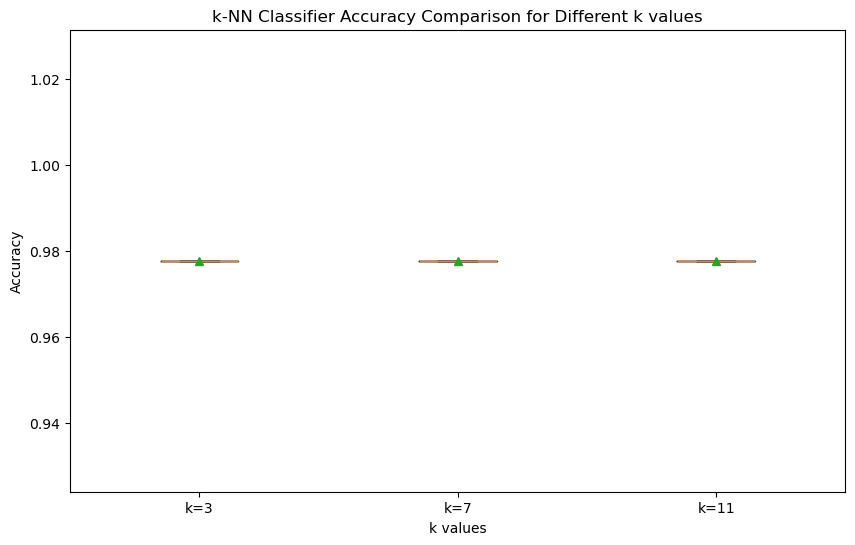

In [222]:
# Evaluating the Classifier
import matplotlib.pyplot as plt

# Parameters
k_values = [3, 7, 11]
n_tests = 30
results = {k: [] for k in k_values}

# Evaluate classifier for each k value
for k in k_values:
    for _ in range(n_tests):
        # Split data randomly
        X_train, y_train, X_test, y_test = split_data(data)
        
        # Predict labels
        y_pred = knn_predict(X_train, y_train, X_test, k)
        
        # Calculate accuracy manually
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        results[k].append(accuracy)

# Plot boxplot for different k values
plt.figure(figsize=(10, 6))
plt.boxplot([results[k] for k in k_values], labels=[f'k={k}' for k in k_values], showmeans=True)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("k-NN Classifier Accuracy Comparison for Different k values")
plt.show()


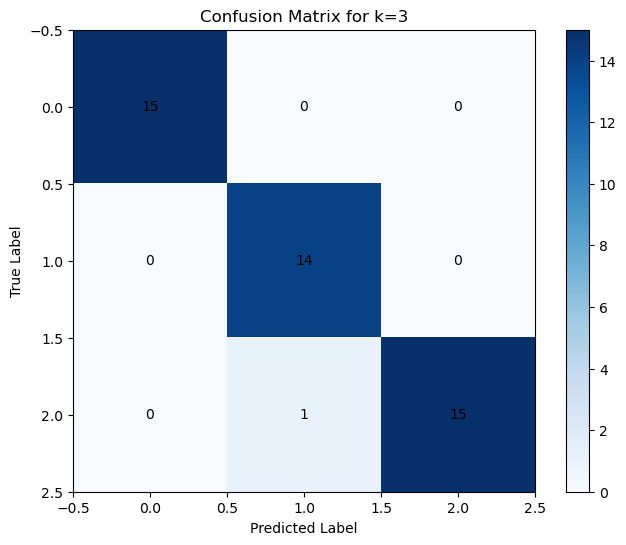

In [223]:
# Ex 2.2
# Function to calculate the confusion matrix
def compute_confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label, pred_label] += 1
    return matrix

# Plot confusion matrix for k=3 as an example
import matplotlib.pyplot as plt

# Perform a single test with k=3
X_train, y_train, X_test, y_test = split_data(data)
y_pred = knn_predict(X_train, y_train, X_test, 3)

# Compute confusion matrix
num_classes = len(np.unique(y_test))
confusion_matrix = compute_confusion_matrix(y_test, y_pred, num_classes)

# Display confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap="Blues", interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for k=3")
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color="black")
plt.show()


In [224]:
# ------------------ Work in Progress ------------------

In [225]:
import numpy as np
import pandas as pd

# Load the Iris data
iris_data_path = './irisData/bezdekIris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(iris_data_path, header=None, names=column_names)

# Select one feature (sepal_length) for simplicity in this example
X = iris_df['sepal_length'].values
y = iris_df['petal_length'].values

# Standardize the data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Gradient Descent for Linear Regression
def gradient_descent(X, y, learning_rate=0.01, num_iterations=100):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias (ones) to X
    theta = np.random.randn(2)  # Random initialization

    for i in range(num_iterations):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Run gradient descent
theta = gradient_descent(X, y)
print(f"Optimal parameters: intercept = {theta[0]}, slope = {theta[1]}")


Optimal parameters: intercept = -0.00034035767659887036, slope = 0.4094838636766856


# Exercicio 3

In [226]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the Iris data
iris_data_path = './irisData/bezdekIris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(iris_data_path, header=None, names=column_names)

# Encode class labels
label_encoder = LabelEncoder()
iris_df['class'] = label_encoder.fit_transform(iris_df['class'])

# Select features and target
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_df['class'].values

# Standardize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize weights randomly
np.random.seed(42)
weights = np.random.randn(X.shape[1], 1)

# Forward pass
def forward_pass(X, weights):
    return sigmoid(np.dot(X, weights))

# Backpropagation
def backpropagation(X, y, weights, learning_rate=0.1, iterations=100):
    m = len(y)
    for i in range(iterations):
        # Forward pass
        output = forward_pass(X, weights)

        # Calculate error
        error = y.reshape(-1, 1) - output

        # Backpropagation step (gradient descent)
        weights += learning_rate * np.dot(X.T, error * sigmoid_derivative(output))

    return weights

# Run backpropagation
weights = backpropagation(X, y, weights)
print(f"Updated weights after backpropagation: {weights.flatten()}")


Updated weights after backpropagation: [ 77.61385185 -41.87117218  97.99629226 105.79401222]


# Exercicio 4

In [227]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris data
iris_data_path = './irisData/bezdekIris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(iris_data_path, header=None, names=column_names)

# Encode class labels
label_encoder = LabelEncoder()
iris_df['class'] = label_encoder.fit_transform(iris_df['class'])

# Split data into features (X) and target (y)
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_df['class'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of k-NN classifier: {accuracy:.2f}")


Accuracy of k-NN classifier: 1.00
